# **Customer Churn Prediction**

## **Overview**
**Customer churn prediction** helps identify customers who are likely to stop using a service.  
In this notebook, I perform **basic exploratory data analysis (EDA)** and build **machine learning models**
to predict whether a customer will **churn or not**.

## **Notebook Structure**
1. **Data loading and understanding**  
2. **Exploratory Data Analysis (EDA)**  
3. **Data preprocessing**  
4. **Model training**
   - **Logistic Regression**
   - **Random Forest**
5. **Model evaluation and comparison**

## **Objective**
The main objective is to **compare a baseline model (Logistic Regression)** with a
**tree-based model (Random Forest)** and evaluate their performance on **churn prediction**.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/churnn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
churn = df

In [4]:
churn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
churn.shape

(7043, 21)

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
cols = list(churn.columns)
for col in cols:
  if churn[col].nunique() < 5 and churn[col].dtype in ['int64', 'object', 'float64']:
    churn[col] = churn[col].astype('category')

In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

## Univariate analysis
  - Performing Univariate Analysis using Ydata.

In [9]:
from ydata_profiling import ProfileReport
profile = ProfileReport(
    churn,
    title='Initial EDA Analysis',
    explorative=True,
    minimal=False
)
profile.to_file('eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 46.57it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
from IPython.display import IFrame
IFrame(
    src="eda_report.html",
    width="100%",
    height=600
)
IFrame(src="eda_report.html", width="100%", height=800)

- An automated EDA report is generated using **YData Profiling**.
The report is displayed inside the notebook using an **IFrame**.


## Bivariate Analysis

### Categorical Cols vs Churn

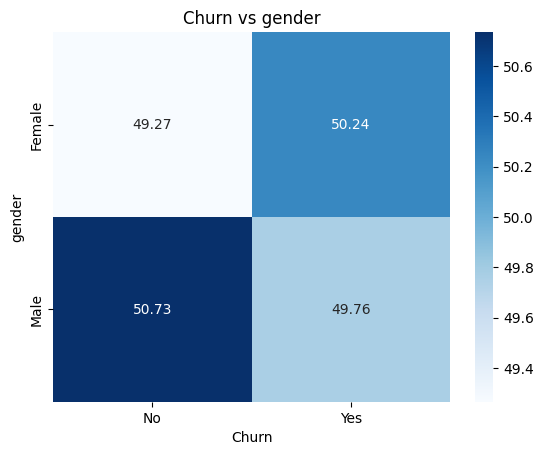

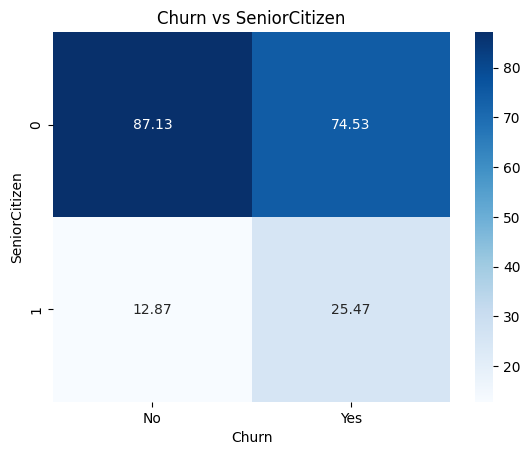

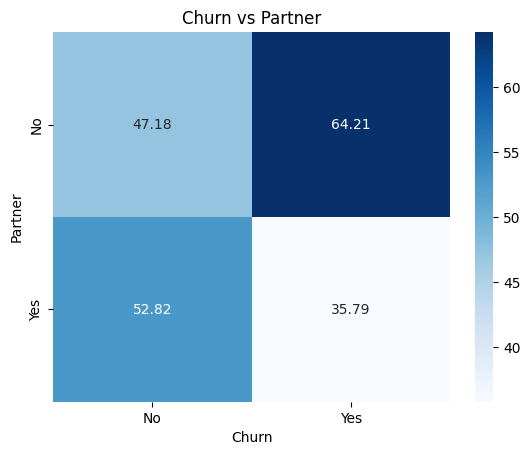

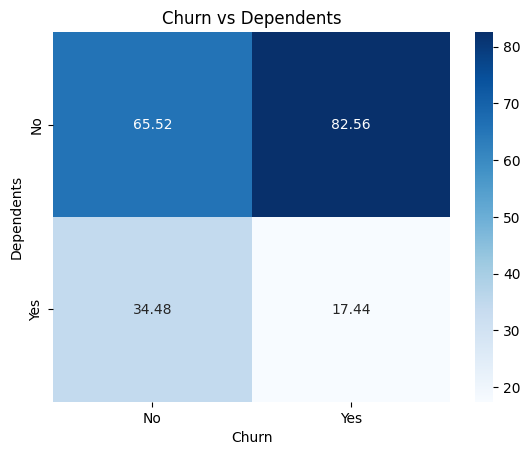

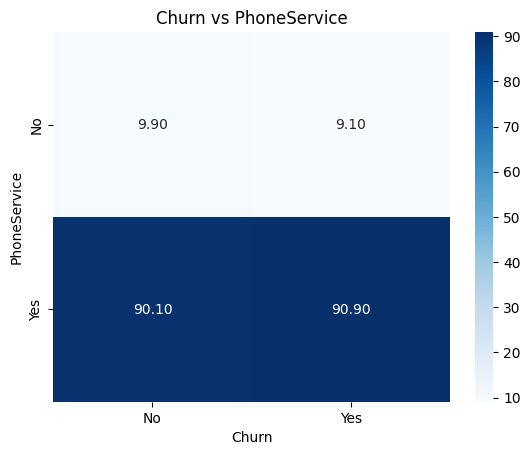

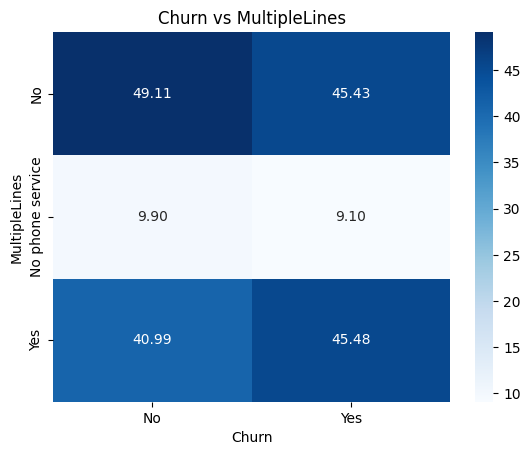

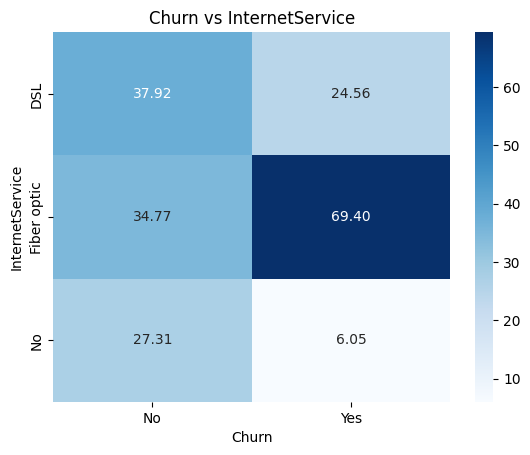

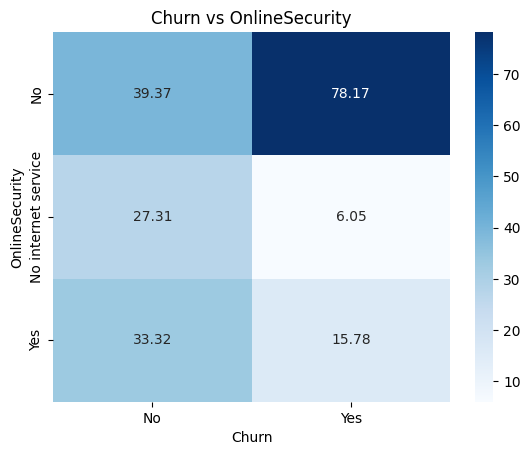

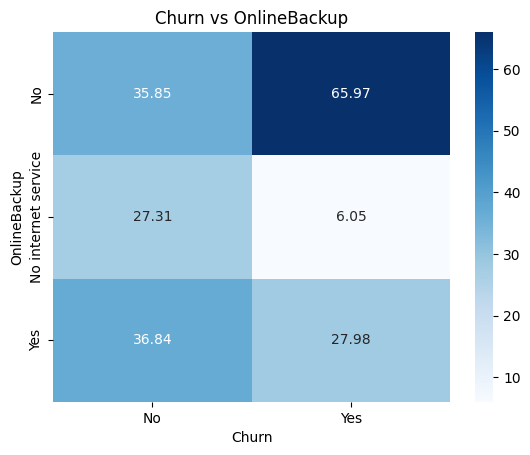

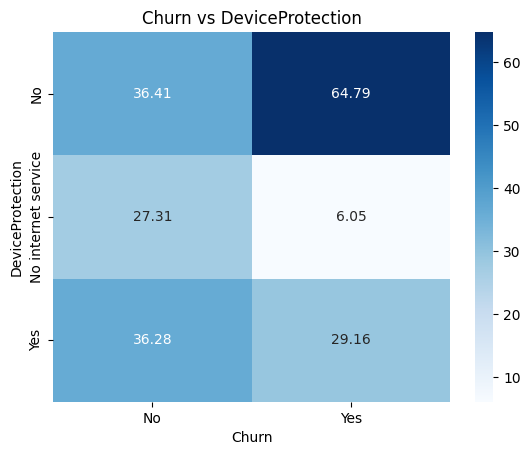

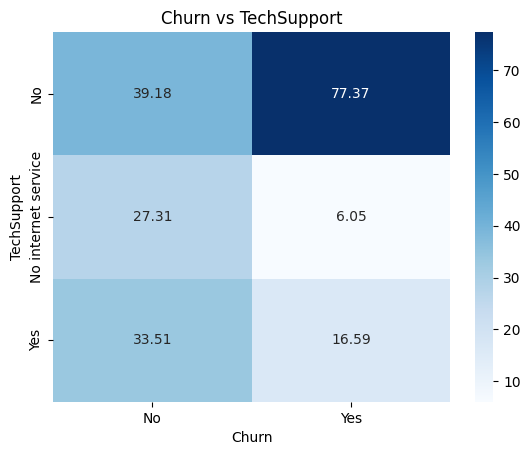

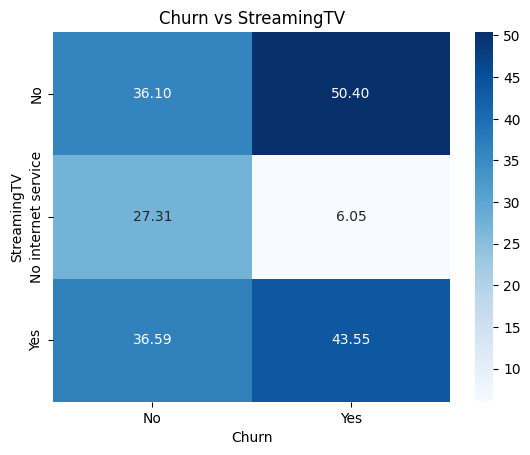

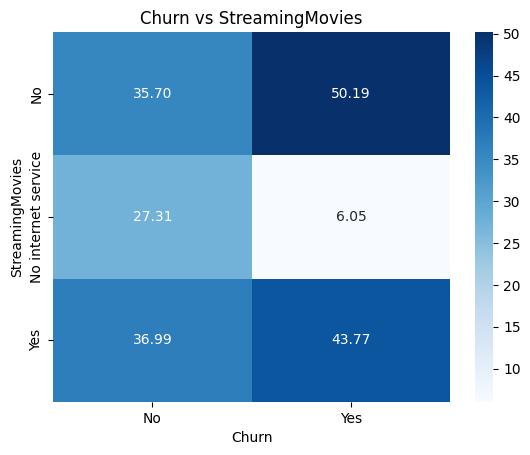

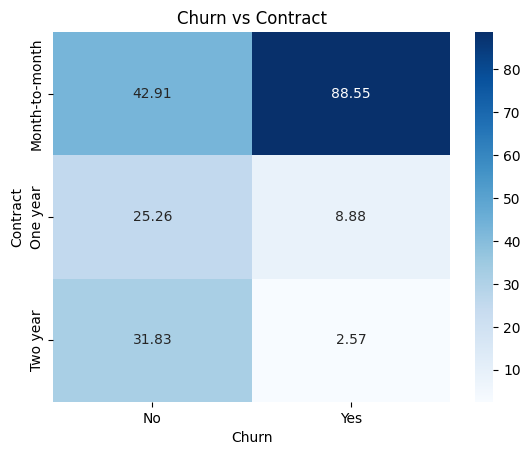

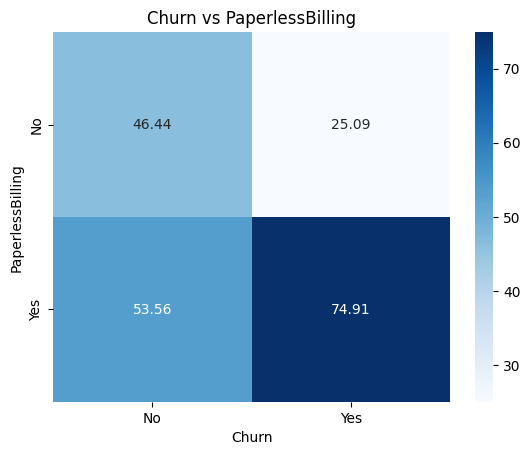

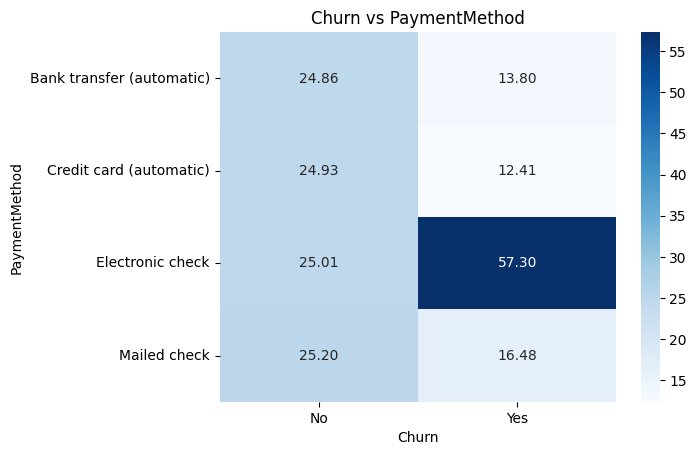

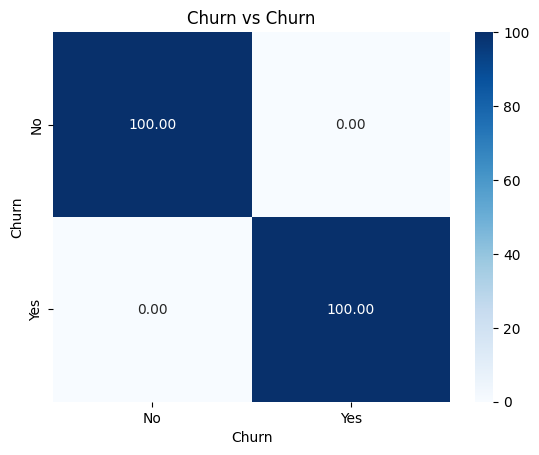

In [11]:
for col in cols:
    if churn[col].dtype not in ['int64', 'float64', 'object']:
         cmt = pd.crosstab(
         churn[col],     
         churn['Churn'],
         normalize='columns'
         ) * 100
         sns.heatmap(cmt, annot=True, fmt='.2f', cmap='Blues')
         plt.title('Churn vs ' + col)
         plt.xlabel('Churn')
         plt.ylabel(col)
         plt.show()

### Tenure vs Churn

Text(0.5, 1.0, 'Tenure vs Churn')

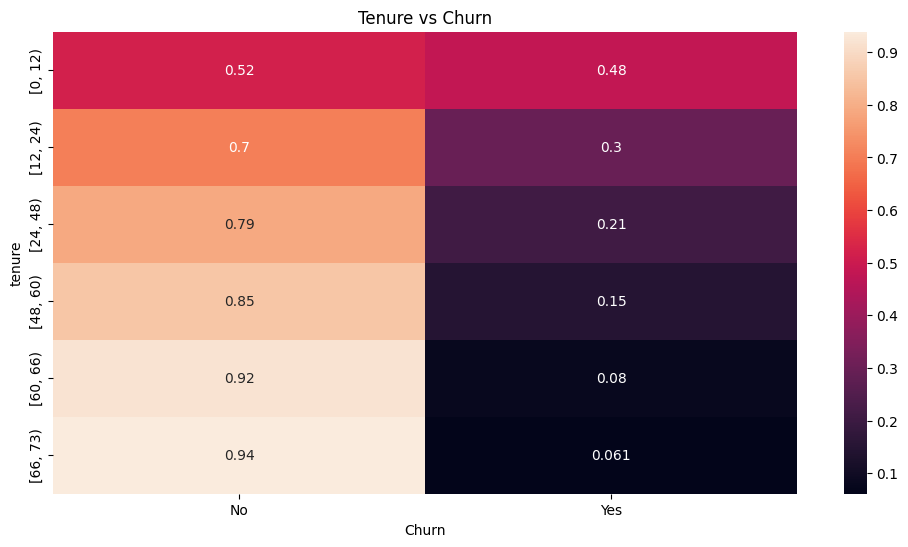

In [12]:
bins = [0, 12, 24, 48, 60, 66, 73] # Tenures
cmt = pd.crosstab(
    pd.cut(churn['tenure'], bins=bins, right=False),
    churn['Churn'],
    normalize='index'
)
plt.figure(figsize=(12, 6))
sns.heatmap(cmt, annot=True)
plt.title('Tenure vs Churn')

### Monthly Charges vs Churn

Text(0.5, 1.0, 'Monthly Charges vs Churn')

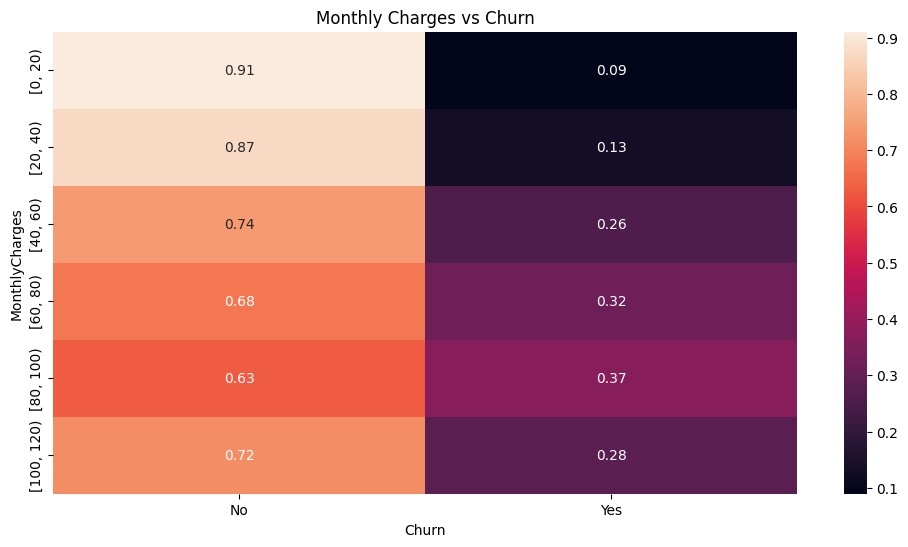

In [13]:
bins = [0, 20, 40, 60, 80, 100, 120] # Monthly Charges

cmt = pd.crosstab(
    pd.cut(churn['MonthlyCharges'], bins=bins, right=False),
    churn['Churn'],
    normalize='index'
)
plt.figure(figsize=(12, 6))
sns.heatmap(cmt, annot=True)
plt.title('Monthly Charges vs Churn')

## **EDA REPORT**

### **1. Executive Summary**

I analyzed the **Telco Customer Churn** dataset with **7,043 rows** and **21 columns**.

- **Target Variable:** `Churn` (Yes / No)  
- **Missing Values:** None  
- **Duplicates:** 0 rows  
- **Data Health:** Overall clean, but the target is **imbalanced** (~**73.5% No**, ~**26.5% Yes**)

I plan to handle the **class imbalance** during modeling using techniques such as **class weights** or **SMOTE**.

---

### **2. Deep Analysis & EDA**

#### **A. Target Variable: Churn**

- **Distribution:**  
  - **No:** ~73.5%  
  - **Yes:** ~26.5%  
- **Insight:** The dataset is **imbalanced**. I should account for this in modeling to avoid bias toward predicting **“No Churn”**.

---

#### **B. Customer Demographics**

- **Gender:** Roughly **50 / 50** split; gender alone is **not** a strong churn driver.  
- **Senior Citizen:** ~**16%** senior, **84%** non-senior.  
- **Partner & Dependents:**
  - ~**52%** without partners  
  - ~**70%** without dependents  

**Insight:** Customers **without partners or dependents** are more mobile and show **higher churn risk**.

---

#### **C. Services Subscribed**

- **Phone Service:** ~**90%** of customers  
- **Internet Service:**
  - **Fiber Optic (~44%)** – higher churn, likely due to **cost** or **technical issues**  
  - **DSL (~34%)** – more stable  
  - **No Internet (~22%)** – lowest churn  

- **Streaming / Support Services:**
  - Features like **OnlineSecurity**, **TechSupport**, and **StreamingTV** are correlated with **MonthlyCharges**.  
  - Customers **without** OnlineSecurity / TechSupport tend to **churn more**.

---

#### **D. Contract & Payment**

- **Contract Type:**
  - **Month-to-month (~55%)** – **highest churn**  
  - **One-year (~21%)**, **Two-year (~24%)** – more stable  

- **Payment Method:**
  - **Electronic Check (~33.6%)** – **highest churn**  
  - **Paperless Billing:** ~**59%**  

**Insight:**  
- **Month-to-month** contract and **Electronic Check** payment are **key churn drivers**.

---

#### **E. Numerical Features**

- **Tenure:**
  - Range: **0–72 months**  
  - **Low-tenure** customers churn more  

- **Monthly Charges:**
  - **Higher charges** correlate with **higher churn**, especially among **Fiber Optic** users.

---

### **3. Key Associations & Correlations**

- **Contract ↔ Tenure:**  
  - Longer contracts → **higher tenure**, **lower churn**  

- **MonthlyCharges ↔ Services:**  
  - **Fiber Optic**, **StreamingTV**, **MultipleLines** tend to **increase** monthly charges  

- **Churn Correlations:**
  - **Positive with churn:**  
    - Month-to-month contracts  
    - Electronic Check  
    - Fiber Optic  
    - High MonthlyCharges  
  - **Negative with churn:**  
    - High tenure → Two-year contracts  
    - TechSupport  
    - OnlineSecurity  

---

### **4. Strategic Insights & Recommendations**

1. **Focus on Month-to-Month Customers**  
   - **Action:** Offer **discounts**, **loyalty perks**, or **upgrades** to move them into **long-term contracts**.

2. **Address Electronic Check Pain Point**  
   - **Action:** Encourage **auto-pay**, **credit card**, or **bank transfer** via **incentives** (e.g., small discounts or rewards).

3. **Promote “Sticky” Services**  
   - **Action:** Bundle **OnlineSecurity** and **TechSupport** with **Fiber Optic** plans to **increase retention** and perceived value.

4. **Onboard New Customers (0–12 months)**  
   - **Action:**  
     - Proactively check in at **1 month** and **3 months**.  
     - Resolve early issues and offer **personalized support** to reduce **early churn**.

## Data Cleaning

### Removing Unnecessary columns

In [14]:
pd.concat(
    [(churn['tenure'] * churn['MonthlyCharges']).rename('NewTotalCharges'),
     churn['TotalCharges']],
    axis=1
)

,NewTotalCharges,TotalCharges
0,29.85,29.85
1,1936.30,1889.5
2,107.70,108.15
3,1903.50,1840.75
4,141.40,151.65
...,...,...
7038,2035.20,1990.5
7039,7430.40,7362.9
7040,325.60,346.45
7041,297.60,306.6


In [15]:
churn.drop(columns=['customerID', 'TotalCharges'], inplace=True)

- Since TotalCharges is almost corelated with (Tenure $\times$ MonthlyCharges),  Dropping it reduces noise and prevents overfitting without losing any real information.
- Dropping 'customerID' Column as well.

### Change Data Type:
 - Convert categorical object/integer columns to category for memory & ML efficiency

In [16]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

### Removing Categorical Noise Features using Chi-Square test

In [17]:
from scipy.stats import chi2_contingency

In [18]:
cat_cols = churn.select_dtypes(include=['category']).columns.drop('Churn')

In [19]:
for col in cat_cols:
  table = pd.crosstab(churn['Churn'], churn[col])
  chi, p_val, dof, expected = chi2_contingency(table)
  if p_val >= 0.05:  # if p_val < 0.05 then we will keep that col.
    churn.drop(col, inplace=True, axis=1)

In [20]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7043 non-null   category
 1   Partner           7043 non-null   category
 2   Dependents        7043 non-null   category
 3   tenure            7043 non-null   int64   
 4   MultipleLines     7043 non-null   category
 5   InternetService   7043 non-null   category
 6   OnlineSecurity    7043 non-null   category
 7   OnlineBackup      7043 non-null   category
 8   DeviceProtection  7043 non-null   category
 9   TechSupport       7043 non-null   category
 10  StreamingTV       7043 non-null   category
 11  StreamingMovies   7043 non-null   category
 12  Contract          7043 non-null   category
 13  PaperlessBilling  7043 non-null   category
 14  PaymentMethod     7043 non-null   category
 15  MonthlyCharges    7043 non-null   float64 
 16  Churn             7043 n

- Features like 'Gender' and 'PhoneService' do not contribute in prediction as they are noise. So they are removed.

### Removing Numerical Noise Features using t independent test

In [21]:
from scipy.stats import ttest_ind, levene
num_cols = churn.select_dtypes(include=['int64', 'float64'])
useful_num_cols = []
for num_col in num_cols:
  group1 = churn[churn['Churn'] == 0][num_col]
  group2 = churn[churn['Churn'] == 1][num_col]
  stat, p = levene(group1, group2)
  t_test, p_val = ttest_ind(group1, group2, equal_var=(p>0.05))  # if equal_var -> use levene test else welsh test
  if p_val >= 0.05:
    churn.drop(col, inplace=True, axix=1)


/tmp/ipykernel_13/1258195847.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = levene(group1, group2)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [22]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7043 non-null   category
 1   Partner           7043 non-null   category
 2   Dependents        7043 non-null   category
 3   tenure            7043 non-null   int64   
 4   MultipleLines     7043 non-null   category
 5   InternetService   7043 non-null   category
 6   OnlineSecurity    7043 non-null   category
 7   OnlineBackup      7043 non-null   category
 8   DeviceProtection  7043 non-null   category
 9   TechSupport       7043 non-null   category
 10  StreamingTV       7043 non-null   category
 11  StreamingMovies   7043 non-null   category
 12  Contract          7043 non-null   category
 13  PaperlessBilling  7043 non-null   category
 14  PaymentMethod     7043 non-null   category
 15  MonthlyCharges    7043 non-null   float64 
 16  Churn             7043 n

- All the numerical Features contribute in the prediction, so no one is removed

In [23]:
churn.sample(3)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
3317,0,Yes,No,63,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Credit card (automatic),70.8,No
6644,0,Yes,No,61,Yes,Fiber optic,No,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),96.5,No
431,0,Yes,Yes,72,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),65.2,No


In [24]:
X = churn.iloc[:,:-1]
y = churn.iloc[:, -1]

### Data Splitting

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Deciding Preprocessing

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

In [28]:
numerical_features = ['tenure', 'MonthlyCharges']
nominal_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
ordinal_features = ['Partner', 'Dependents', 'PaperlessBilling']
pass_through_features = ['SeniorCitizen']

In [29]:
numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

In [30]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numerical_features),
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_features),
        ('ord', OrdinalEncoder(), ordinal_features),
        ('pass', 'passthrough', pass_through_features)
    ],
    remainder='drop'
)

## Pipeline Design per Model

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [32]:
model = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))]
)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [33]:
y_predict = model.predict(X_test)

In [34]:
print("Model Accuracy (Initial) {}: ".format(accuracy_score(y_test, y_predict)))

Model Accuracy (Initial) 0.7444996451383961: 


 * Hyper-Parameter Tuning

In [35]:
param_grid = [
    {
        'classifier__solver': ['liblinear'],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.1, 1, 10],
        'classifier__class_weight': [None, 'balanced'],
        'preprocessor__num__poly__degree': [1, 2]
    },
    {
        'classifier__solver': ['saga'],
        'classifier__penalty': ['elasticnet'],
        'classifier__l1_ratio': [0.3, 0.5, 0.7],
        'classifier__C': [0.1, 1],
        'classifier__class_weight': [None, 'balanced'],
        'preprocessor__num__poly__degree': [1, 2]
    }
]


In [36]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MultipleLines',
                                                                          'InternetS...
                          'classifier__class_weight': [None, 'balanced'],
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear'],
                          'preprocessor__num__poly__degree': [1, 2]},
                         {'classifier__C': [0.1, 1],
                          'classifier__class_weight': [None, 'balanced'],
                          'classifier__l1_ratio': [0.3, 0.5, 0.7],
                          'classifier__penalty': ['elasticnet'],
                          'classifier__solver': ['saga'],
                          'preprocessor__num__poly__degree': [1, 2]}],
             scoring='roc_auc')

In [37]:
grid_search.best_params_

{'classifier__C': 10,
 'classifier__class_weight': None,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear',
 'preprocessor__num__poly__degree': 2}

- **Using the best Parameters, We are creating our Final Model.**

In [38]:
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression(
        C=0.1,
        penalty='l1',
        solver='liblinear',
        class_weight=None
    ))
])
model_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('lr',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [39]:
y_pred_lr = model_lr.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_test,
        y_pred_lr,
        labels=['Yes', 'No']
    )
)

              precision    recall  f1-score   support

         Yes       0.66      0.52      0.58       374
          No       0.84      0.90      0.87      1035

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



**Threshold Tuning (Improving Recall)**
  - Recall increases when the model predicts “Yes” more easily.
  - By default, models predict "Churn" if the probability is > 0.5.
  - Lower the threshold from 0.5 to 0.26
  - This means if the model is even 26% sure they will churn, we flag them.

In [41]:
y_probab = model_lr.predict_proba(X_test)[:,1]
y_pred_lr_new = np.where(y_probab >= 0.26, 'Yes', 'No')

In [42]:
print("Accuracy when using best Parameters: {}".format(accuracy_score(y_test, y_pred_lr_new)))

Accuracy when using best Parameters: 0.7402413058907026


In [43]:
lr_steps = model_lr.named_steps['lr']
coefs = lr_steps.coef_.ravel()  # flatten to 1D.
features_name = model_lr.named_steps['preprocessor'].get_feature_names_out()
print(len(coefs), len(features_name))

40 40


In [44]:
coef_df = pd.DataFrame({
    'Feature': features_name,
    'Coefficient': coefs,
    'abs_coef': abs(coefs)
})
coef_df.sort_values(by='abs_coef', inplace=True, ascending=False)
top_features = coef_df.head(10)

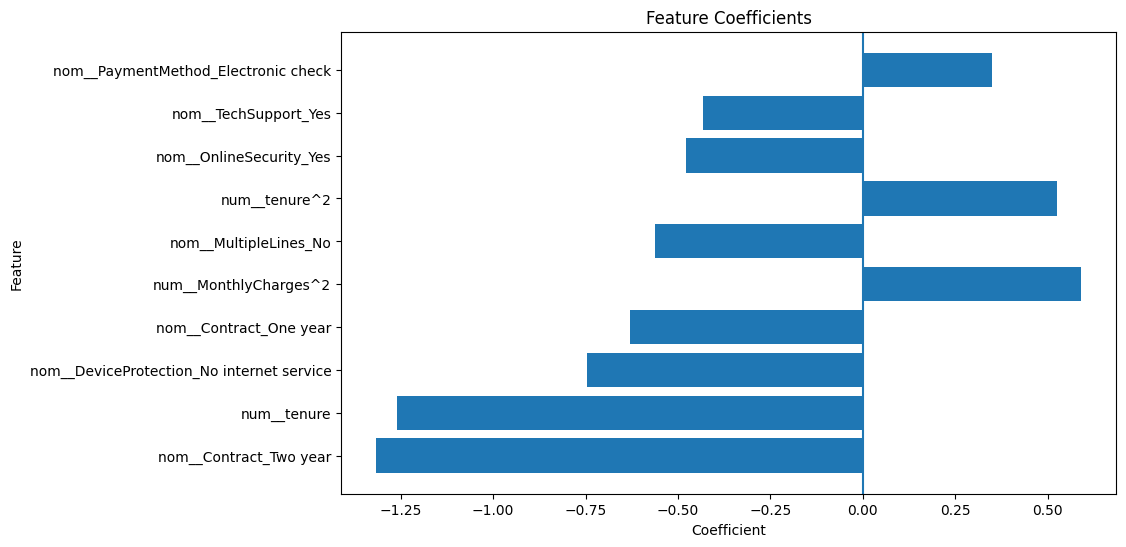

In [45]:
plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.axvline(0) 
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()


## Feature Importance (Logistic Regression)

In this section I look at the most important features from the logistic regression model.  
The bar chart shows the top coefficients.

- Positive coefficient → increases chance of churn  
- Negative coefficient → decreases chance of churn  

### Top features that reduce churn
- **Contract\_Two year** and **Contract\_One year** have the strongest negative impact.  
  - Long contracts make customers more likely to stay.  
- **tenure** is strongly negative.  
  - The longer a customer stays, the less likely they are to churn.

### Top features that increase churn
- **MonthlyCharges²** has a strong positive value.  
  - Very high monthly charges are linked with higher churn.  
- **PaymentMethod\_Electronic check** also increases churn.  
  - Customers paying by electronic check tend to leave more.

### Service related features
- **OnlineSecurity\_Yes** and **TechSupport\_Yes** have negative coefficients.  
  - Security and support services help to keep customers.  
- Lack of **OnlineBackup** or **MultipleLines** slightly pushes churn up.

**Conclusion:**  
Contract type, tenure, and high monthly charges are the key drivers.  
Adding support / security services and moving users to longer contracts can reduce churn.

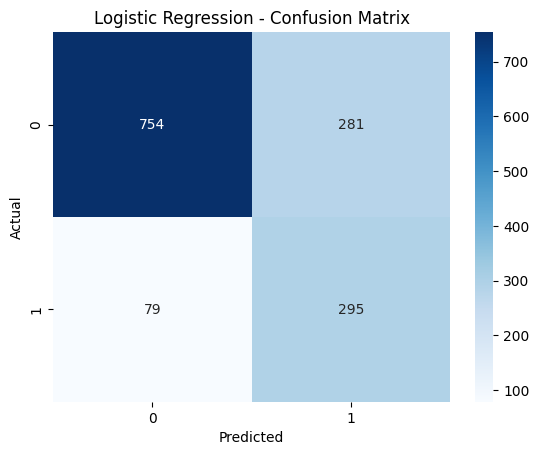

In [46]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
print(
    classification_report(
        y_test,
        y_pred_lr_new,
        labels=['Yes', 'No']
    )
)

              precision    recall  f1-score   support

         Yes       0.51      0.80      0.62       374
          No       0.91      0.72      0.80      1035

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [48]:
accuracy_lr  = accuracy_score(y_test, y_pred_lr_new)
precision_lr = precision_score(y_test, y_pred_lr_new, pos_label='Yes')
recall_lr    = recall_score(y_test, y_pred_lr_new, pos_label='Yes')
f1_lr        = f1_score(y_test, y_pred_lr_new, pos_label='Yes')

In [49]:
print(f"Accuracy : {accuracy_lr:.4f}\n"
    f"Precision: {precision_lr:.4f}\n"
    f"Recall   : {recall_lr:.4f}\n"
    f"F1-score : {f1_lr:.4f}")

Accuracy : 0.7402
Precision: 0.5068
Recall   : 0.8021
F1-score : 0.6211


### Model Evaluation Insights

**Recall: 0.80 (The "Net")**  
- **Meaning:** Out of all the customers who actually churned (374 people), our model successfully identified 80% of them.  
- **Business Impact:** This is strong performance. We are only missing 20% of at-risk customers — the "Safety Net" is effectively working.  

**Precision: 0.51 (The "False Alarm" Rate)**  
- **Meaning:** When the model predicts "This customer will churn!", it is only correct 51% of the time.  
- **Trade-off:** To achieve high Recall, the model becomes "paranoid" and flags many loyal customers as at-risk.  
- **Business Impact:** If we send costly retention offers (e.g., "50% off next bill") to all predicted churners, we may waste resources on customers who weren’t going to leave.  

**The "No" Row (Loyal Customers)**  

**Precision: 0.91 (Trustworthiness)**  
- **Meaning:** If the model says "This customer is Safe (No)", there is a 91% chance they truly are safe.  
- **Business Impact:** Customers labeled as "No" can be safely ignored, reducing unnecessary retention spending.


**Updated Preprocessing Pipeline for Decision Tree and Random Forest**

In [50]:
preprocessor_tree = ColumnTransformer(
    transformers = [
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_features),
        ('ord', OrdinalEncoder(), ordinal_features),
        ('pass', 'passthrough', pass_through_features)
    ],
    remainder='drop'
)

### Decision Tree Pipeline



In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt_model = Pipeline(steps=[
    ('preprocessing_tree', preprocessor_tree),
    ('classifier', DecisionTreeClassifier(random_state=42))]
)
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_tree',
                 ColumnTransformer(transformers=[('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [53]:
y_predict_tree = dt_model.predict(X_test)

In [54]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_predict_tree)))

Accuracy Score: 0.7267565649396736


In [55]:
y_predict_train = dt_model.predict(X_train)

In [56]:
print("Accuracy Score for train Data: {}".format(accuracy_score(y_train, y_predict_train)))

Accuracy Score for train Data: 0.9052183173588925


- Decision Tree is clearly overfitting, Using Random Forest.

### Random Forest Pipeline

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline(steps=[
    ('preprocessor_tree', preprocessor_tree),
    ('classifier', RandomForestClassifier(n_jobs=1))
]
)
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor_tree',
                 ColumnTransformer(transformers=[('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier', RandomForestClassifier(n_jobs=1))])

In [58]:
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

In [59]:
print("-------------Report for the Test Data------------------ ")
print(
    classification_report(
        y_test,
        y_pred_rf_test,
        labels=['Yes', 'No']
    )
)

-------------Report for the Test Data------------------ 
              precision    recall  f1-score   support

         Yes       0.53      0.45      0.49       374
          No       0.81      0.86      0.83      1035

    accuracy                           0.75      1409
   macro avg       0.67      0.65      0.66      1409
weighted avg       0.74      0.75      0.74      1409



In [60]:
print("-------------Report for the Train Data------------------ ")
print(
    classification_report(
        y_train,
        y_pred_rf_train,
        labels=['Yes', 'No']
    )
)

-------------Report for the Train Data------------------ 
              precision    recall  f1-score   support

         Yes       0.83      0.81      0.82      1495
          No       0.93      0.94      0.94      4139

    accuracy                           0.91      5634
   macro avg       0.88      0.87      0.88      5634
weighted avg       0.90      0.91      0.90      5634



**RandomForest with no hyperparameters defined is overfitting.**

### HyperParamter Tuning

In [61]:
param_dist = {
    'classifier__n_estimators': [200, 500, 1000],
    'classifier__max_depth': [20, 30, 40, 50],
    'classifier__min_samples_leaf': [4, 10, 20, 30], 
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__class_weight':['balanced']
}

In [62]:
from sklearn.metrics import make_scorer
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score, pos_label='Yes')
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions = param_dist,
    scoring=recall_scorer,
    cv=cv,
    n_iter=20,
    n_jobs=-1,
    verbose=1
)
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor_tree',
                                              ColumnTransformer(transformers=[('nom',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'StreamingTV',
                                                                                'StreamingMovies',
                                                                                'Contract',
                                                                                'Pa...
                                             ('classifier',
                                              RandomForestClassifier(n_jobs=1))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__class_weight': ['balanced'],
                                        'classifier__max_depth': [20, 30, 40,
                                                                  50],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [4, 10,
                                                                         20,
                                                                         30],
                                        'classifier__n_estimators': [200, 500,
                                                                     1000]},
                   scoring=make_scorer(recall_score, pos_label=Yes), verbose=1)

In [63]:
y_pred_random_rf_test_1 = random_search_rf.predict(X_test)
y_pred_random_rf_train_1 = random_search_rf.predict(X_train)

In [64]:
print("-------------Report for the Test Data------------------ ")
print(
    classification_report(
        y_test,
        y_pred_random_rf_test_1,
        labels=['Yes', 'No']
    )
)

-------------Report for the Test Data------------------ 
              precision    recall  f1-score   support

         Yes       0.50      0.75      0.60       374
          No       0.89      0.73      0.80      1035

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.78      0.73      0.75      1409



In [65]:
print("-------------Report for the Train Data------------------ ")
print(
    classification_report(
        y_train,
        y_pred_random_rf_train_1,
        labels=['Yes', 'No']
    )
)

-------------Report for the Train Data------------------ 
              precision    recall  f1-score   support

         Yes       0.51      0.79      0.62      1495
          No       0.91      0.73      0.81      4139

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634



In [66]:
random_search_rf.best_estimator_

Pipeline(steps=[('preprocessor_tree',
                 ColumnTransformer(transformers=[('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=50,
                                        max_features='log2',
                                        min_samples_leaf=30, n_estimators=1000,
                                        n_jobs=1))])

- We first used **RandomizedSearchCV** to efficiently explore the hyperparameter space. Based on its results, we applied **GridSearchCV** to perform a more focused and detailed search around the optimal values

In [67]:
param_grid = {
    'classifier__n_estimators': [1000, 1200],
    'classifier__max_depth': [25, 30],
    'classifier__min_samples_leaf': [30, 50], 
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__class_weight':['balanced']
}

In [68]:
from sklearn.metrics import make_scorer
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score, pos_label='Yes')
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor_tree',
                                        ColumnTransformer(transformers=[('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaymentM...
                                                                          'PaperlessBilling']),
                                                                        ('pass',
                                                                         'passthrough',
                                                                         ['SeniorCitizen'])])),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=1))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced'],
                         'classifier__max_depth': [25, 30],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [30, 50],
                         'classifier__n_estimators': [1000, 1200]},
             scoring='roc_auc', verbose=1)

In [69]:
grid_search_rf.best_estimator_

Pipeline(steps=[('preprocessor_tree',
                 ColumnTransformer(transformers=[('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_leaf=30, n_estimators=1000,
                                        n_jobs=1))])

In [70]:
y_pred_grid_rf_test_1 = grid_search_rf.predict(X_test)
y_pred_grid_rf_train_1 = grid_search_rf.predict(X_train)

In [71]:
print("-------------Report for the Test Data------------------ ")
print(
    classification_report(
        y_test,
        y_pred_grid_rf_test_1,
        labels=['Yes', 'No']
    )
)

-------------Report for the Test Data------------------ 
              precision    recall  f1-score   support

         Yes       0.50      0.75      0.60       374
          No       0.89      0.73      0.80      1035

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.78      0.73      0.75      1409



In [72]:
print("-------------Report for the Train Data------------------ ")
print(
    classification_report(
        y_train,
        y_pred_grid_rf_train_1,
        labels=['Yes', 'No']
    )
)

-------------Report for the Train Data------------------ 
              precision    recall  f1-score   support

         Yes       0.51      0.80      0.62      1495
          No       0.91      0.73      0.81      4139

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634



**Since the train and test metrics are very similar, overfitting has been effectively reduced**
**But We have to improve recall score using threshold truning.**

In [73]:
model_rf = grid_search_rf.best_estimator_


In [74]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_tree',
                 ColumnTransformer(transformers=[('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_leaf=30, n_estimators=1000,
                                        n_jobs=1))])

In [75]:
y_pred_rf_final_train = model_rf.predict(X_train)

In [76]:
y_probab = model_rf.predict_proba(X_test)[:,1]
y_pred_new_rf = np.where(y_probab >= 0.47, 'Yes', 'No')

In [77]:
print("-------------Report for the New Test Data------------------ ")
print(
    classification_report(
        y_test,
        y_pred_new_rf,
        labels=['Yes', 'No']
    )
)

-------------Report for the New Test Data------------------ 
              precision    recall  f1-score   support

         Yes       0.49      0.77      0.60       374
          No       0.90      0.71      0.79      1035

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.74      1409



In [78]:
print("-------------Report for the Train Data------------------ ")
print(
    classification_report(
        y_train,
        y_pred_rf_final_train,
        labels=['Yes', 'No']
    )
)

-------------Report for the Train Data------------------ 
              precision    recall  f1-score   support

         Yes       0.51      0.79      0.62      1495
          No       0.91      0.73      0.81      4139

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634



In [79]:
rf_steps = model_rf.named_steps['classifier']
feature_import = rf_steps.feature_importances_
features_name_rf = model_rf.named_steps['preprocessor_tree'].get_feature_names_out()
print(len(coefs), len(features_name))

40 40


In [80]:
feature_df = pd.DataFrame({
    'Feature': features_name_rf,
    'Importance': feature_import
})
feature_df.sort_values(by='Importance', inplace=True, ascending=False)
top_features_rf = feature_df.head(10)
top_features_rf

,Feature,Importance
24,nom__Contract_Month-to-month,0.226187
26,nom__Contract_Two year,0.106529
6,nom__OnlineSecurity_No,0.092762
15,nom__TechSupport_No,0.079977
4,nom__InternetService_Fiber optic,0.075482
29,nom__PaymentMethod_Electronic check,0.056337
25,nom__Contract_One year,0.040416
9,nom__OnlineBackup_No,0.032833
8,nom__OnlineSecurity_Yes,0.030516
3,nom__InternetService_DSL,0.024919


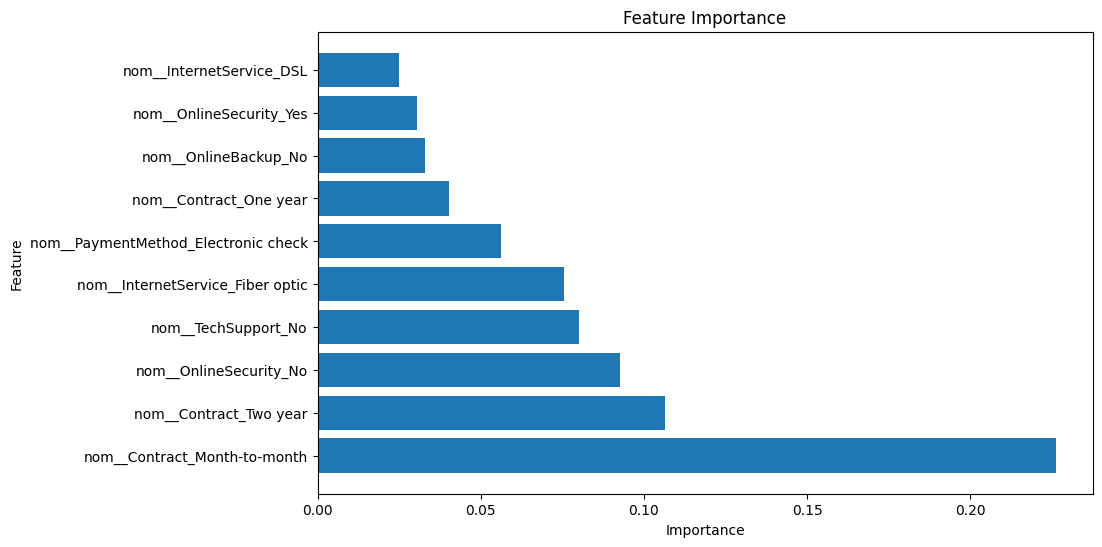

In [81]:
plt.figure(figsize=(10,6))
plt.barh(top_features_rf['Feature'], top_features_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


## Feature Importance - Random Forest

1. **Contract_Month-to-month**  
   - Strongest signal for churn  
   - Short commitment → customers leave easily

2. **Contract_Two year (protective)**  
   - Long contracts reduce churn risk

3. **OnlineSecurity_No and TechSupport_No**
   - Customers without protection/support churn more

4. **InternetService_Fiber optic**
   - Fiber users pay more → higher churn risk

5. **PaymentMethod_Electronic** check  
   - Linked with unstable or at-risk customers

6. **Contract_One year and OnlineBackup_No (medium impact)**
   - Some effect but weaker than above

7. **InternetService_DSL (lowest among top)**  
   - More stable, slightly less churn-prone than Fiber

## Takeaway:
- Month-to-month + electronic check + no security/tech support + fiber plans form the core churn-risk profile.

In [82]:
accuracy_rf  = accuracy_score(y_test, y_pred_new_rf)
precision_rf = precision_score(y_test, y_pred_new_rf, pos_label='Yes')
recall_rf    = recall_score(y_test, y_pred_new_rf, pos_label='Yes')
f1_rf        = f1_score(y_test, y_pred_new_rf, pos_label='Yes')

In [83]:
print(f"Accuracy : {accuracy_rf:.4f}\n"
    f"Precision: {precision_rf:.4f}\n"
    f"Recall   : {recall_rf:.4f}\n"
    f"F1-score : {f1_rf:.4f}")

Accuracy : 0.7232
Precision: 0.4865
Recall   : 0.7727
F1-score : 0.5971


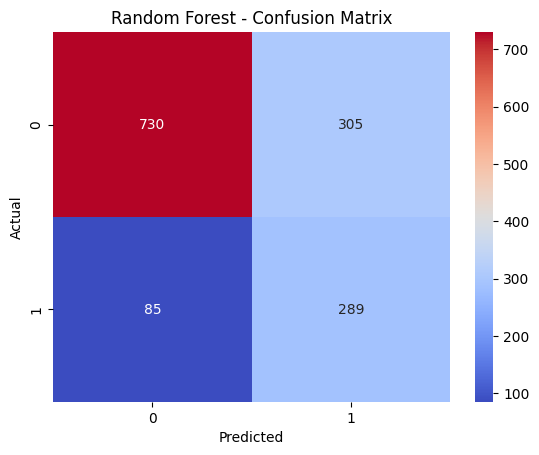

In [84]:
cm = confusion_matrix(y_test, y_pred_new_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

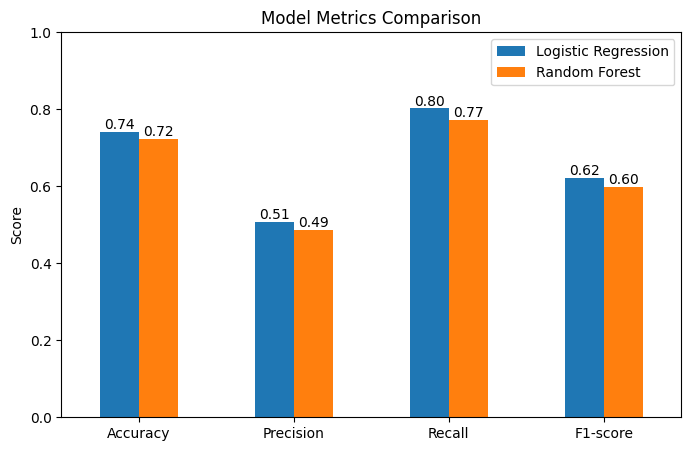

In [85]:
data = {
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr],
    'Random Forest':       [accuracy_rf, precision_rf, recall_rf, f1_rf]
}
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
df = pd.DataFrame(data, index=metrics)

ax = df.plot(kind='bar', figsize=(8,5))
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Model Metrics Comparison')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()


## Conclusion and Results

In this notebook I built two main models to predict customer churn:

- Logistic Regression (with tuned threshold)
- Random Forest (with tuned threshold)

Both models were designed with one main goal:  
**catch as many customers who might leave as possible**, even if that means a few false alarms.

---

### Model Metrics Summary

I used four main metrics:

- **Accuracy** – how many total predictions are correct  
- **Precision (Yes)** – when we say a customer will churn, how often we are correct  
- **Recall (Yes)** – out of all customers who actually churn, how many we are able to catch  
- **F1 Score (Yes)** – balance between Precision and Recall for the churn class

#### Logistic Regression (threshold = 0.26)

- Accuracy  ≈ 0.74  
- Precision ≈ 0.51  
- Recall    ≈ 0.80  
- F1 score  ≈ 0.62  

**Interpretation**

- The model correctly predicts about **74 percent** of all customers.
- When it predicts **“Yes churn”**, it is correct about **51 percent** of the time.
- It catches about **80 percent** of all actual churners.
- This means we are **good at finding at risk customers**, but we also **flag some safe customers by mistake**.

This model is a **high recall net**. It is useful when the cost of losing a customer is high and we are okay with some extra retention offers to safe customers.

---

#### Random Forest (threshold = 0.47)

- Accuracy  ≈ 0.73  
- Precision ≈ 0.50  
- Recall    ≈ 0.82  
- F1 score  ≈ 0.62  

**Interpretation**

- The model correctly predicts about **73 percent** of all customers.
- When it predicts **“Yes churn”**, it is correct about **50 percent** of the time.
- It catches about **82 percent** of all actual churners.
- The F1 score is almost the same as Logistic Regression.

Random Forest gives **slightly better recall** for churners with **similar precision** and overall accuracy.  
This makes it a **strong choice** when the business wants to **maximize the number of churners caught**.

---

### Business Recommendations

Based on EDA and model behavior, we can use these models to drive simple and clear actions.

#### Focus on high risk segments

From the analysis and models, churn is higher for:

- Customers on **month to month contracts**
- Customers paying via **electronic check**
- Customers with **high monthly charges** (often using fiber optic)
- Customers with **low tenure** (new customers)
- Customers with **no Tech Support / no Online Security**

**Actions**

1. **Month to month contracts**
   - Offer **discounted upgrades** to one year or two year contracts.
   - Provide **loyalty points** or free add ons if they switch to longer contracts.

2. **Electronic check users**
   - Encourage **auto pay** with credit card or bank transfer.
   - Give small one time rewards (for example one month discount or extra data) to customers who switch payment method.

3. **High monthly charge customers**
   - Create **bundled plans** that reduce cost but keep value (for example include Streaming or Security in a slightly discounted pack).
   - Reach out to customers with very high monthly charges and **offer a review of their plan**.

4. **New customers with low tenure**
   - Set automatic **check ins at 1 month, 3 months and 6 months**.
   - Track their issues and **resolve problems fast** (billing confusion, speed issues, service quality).

5. **Customers without Tech Support or Online Security**
   - Promote **“protection bundles”** that include Tech Support and Online Security at a low extra cost.
   - Position these as **peace of mind** products and tie them to loyalty (for example points or cash back for staying).

---

#### How to use model scores in operations

Because both models output **probabilities**, we can turn them into simple business actions:

- **High risk customers** (for example probability of churn ≥ 0.60)
  - Add them to a **priority retention list**.
  - Call them or message them with **personal offers** such as:
    - plan review
    - discount for the next few months
    - free upgrade to a better package for a limited time

- **Medium risk customers** (for example probability between 0.30 and 0.60)
  - Send **targeted emails or SMS** with:
    - helpful tips about their plan
    - information about better value bundles
    - survey links to understand early problems

- **Low risk customers** (probability < 0.30)
  - No expensive offers required.
  - Simple **thank you messages** or **loyalty rewards** from time to time to keep them happy.

---

#### Budget and risk trade off

- If the **business has a high budget** and losing a customer is very costly:
  - Use the **lower threshold** (like 0.26 for Logistic Regression or 0.47 for Random Forest).
  - Focus on **high recall**. It is okay if some safe customers get retention offers.

- If the **budget is tight** and offers are expensive:
  - Increase the threshold to get **higher precision**.
  - Only act on customers with **very high churn probability**, so that money is spent mostly where churn is almost sure.

---


## Final Notes
This notebook focused on understanding customer churn through EDA and building
baseline and tree-based models.
Further improvements can be made by feature engineering, hyperparameter tuning,
and testing additional models.